In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# 1. Rosenbrock funkcijos minimizavimas (nusileidimo žingsnio ieškojimas)

In [203]:
def grad_desc(f, vars, cur, rate, prec=.000001, max_iters=10000, iters=0):
  path = []
  
  while iters < max_iters:
    prev = cur[:]
    vals = dict(zip(vars, prev))
    for i,var in enumerate(vars):
      f_diff = f.diff(var)
      cur[i] = cur[i] - rate * N(f_diff.subs(vals))
  
    iters = iters+1
    
    diff = []
    for c,p in zip(cur, prev):
      diff.append(abs(c-p))
    
    path.append(cur[:])
  
    if all(i < prec for i in diff):
      break
  
  #print('DONE WITH RATE: ', round(rate,5))
  return path, cur[:], iters

In [88]:
# Defining Rosenbrock function
f = sympify('100*(y-x**2)**2+(1-x)**2')

# Getting all functions variables and amount of them
vars = f.atoms(Symbol)
num_of_vars = len(vars)

In [114]:
cur_var = [-1,1]
lrates = [1e-5, 1e-4, 1e-3]
grad_path = []
grad_min = []
grad_iter = []

for lrate in lrates:
  p, mini, it = grad_desc(f, vars, cur_var, lrate)
  grad_path.append(p)
  grad_min.append(mini)
  grad_iter.append(it)


DONE WITH RATE:  1e-05
DONE WITH RATE:  0.0001
DONE WITH RATE:  0.001


In [115]:
for i,j,k in zip(lrates, grad_min, grad_iter):
  ane = dict(zip(vars, j))
  print("with rate: ", round(i,5),' X/Y: ', j,' minimum: ', f.subs(ane).evalf(), ' took: ',k,' iters')

with rate:  1e-05  X/Y:  [-0.912640927652381, 0.840972429743907]  minimum:  3.66469001290903  took:  10000  iters
with rate:  0.0001  X/Y:  [0.436271207084745, 0.187532377576988]  minimum:  0.318574257555594  took:  10000  iters
with rate:  0.001  X/Y:  [0.995175103985597, 0.990354124186255]  minimum:  2.33171157008858e-5  took:  10000  iters


## Grafikai su nusileidimo žingsniais 0.00001, 0.0001 ir 0.001

In [128]:
plt.rcParams["figure.figsize"] = (20,10)

In [227]:
def plot_des(indx, dims=[-1.1, 1.1], pos=[-1,1]):
  f_np = lambdify(tuple(vars), f, 'numpy')

  xaxis = np.linspace(dims[0],dims[1],100)
  yaxis = np.linspace(dims[0],dims[1],100)
  n_x, n_y = np.meshgrid(xaxis, yaxis)

  grad_path[indx].insert(0, pos)
  pp = np.array(grad_path[indx][0::1000])
  

  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(n_x,n_y, f_np(n_x, n_y), alpha=0.2, color='b', rstride=5, cstride=5)
  ax.plot(*pp.T, 'go-', markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)

  ax.set_xlabel('x', labelpad=30, fontsize=24, fontweight='bold')
  ax.set_ylabel('y', labelpad=30, fontsize=24, fontweight='bold')
  ax.set_zlabel('f(x,y)', labelpad=30, fontsize=24, fontweight='bold')

  ax.view_init(elev=45., azim=20)
  fig.suptitle("Minimization f(x,y) with step of "+str(lrates[indx]), fontsize=24, fontweight='bold')

  
'''pp = np.array(grad_path[2][0::500])

plt.contour(n_x, n_y, f_np(n_x,n_y), levels=100, cmap='jet')
plt.plot(*pp.T, 'go-', color='k')

plt.show()'''

"pp = np.array(grad_path[2][0::500])\n\nplt.contour(n_x, n_y, f_np(n_x,n_y), levels=100, cmap='jet')\nplt.plot(*pp.T, 'go-', color='k')\n\nplt.show()"

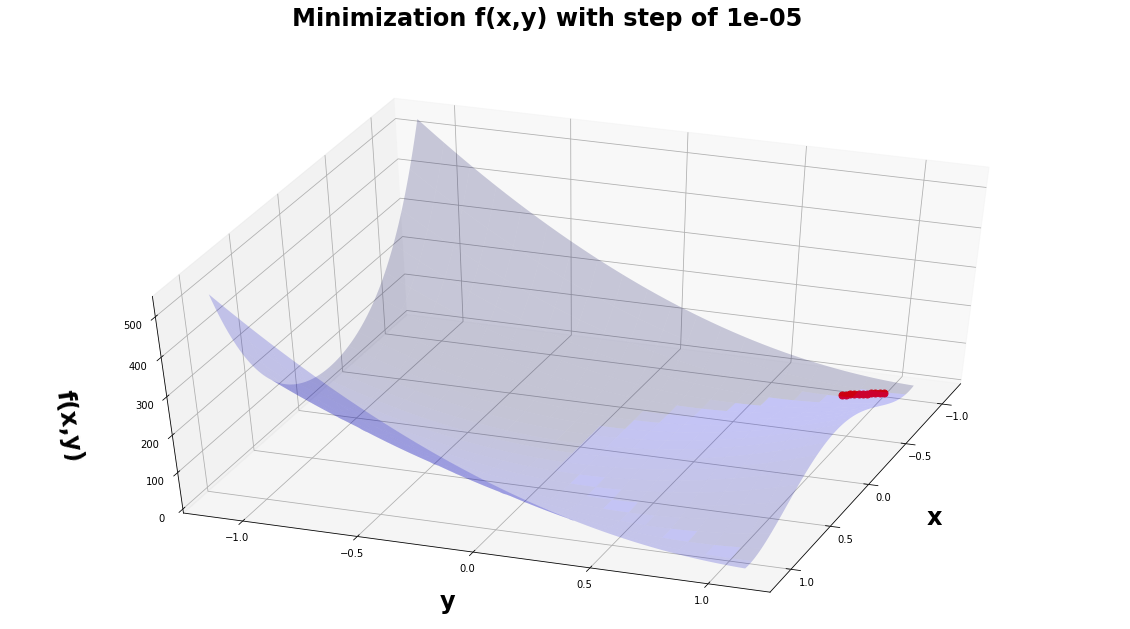

In [207]:
plot_des(0)

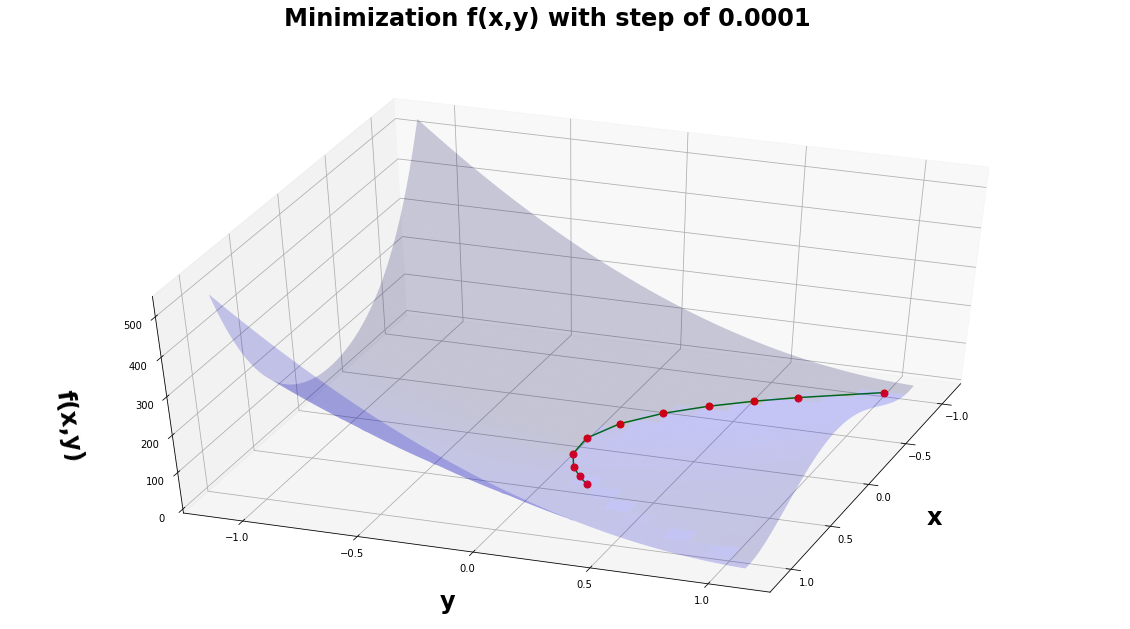

In [200]:
plot_des(1)

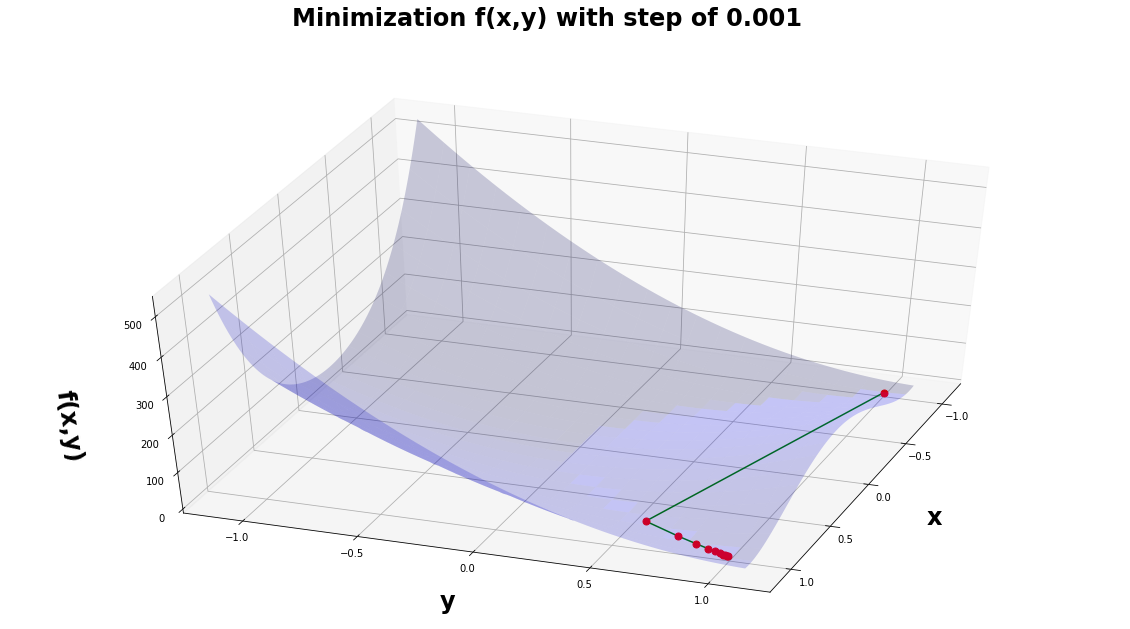

In [201]:
plot_des(2)

## Skirtingos pradžios pozicijos

In [217]:
posis = [[-3,-3], [1,-1], [0,0], [3,3], [2,2], [1,2], [2,1]]
grad_path = []
grad_min = []
grad_iter = []
step = .001

for pos in posis:
  p, mini, it = grad_desc(f,vars,pos,step)
  grad_path.append(p)
  grad_min.append(mini)
  grad_iter.append(it)


In [229]:
orig_pos[1]

[1, -1]

In [223]:
orig_pos = [[-3,-3], [1,-1], [0,0], [3,3], [2,2], [1,2], [2,1]]

In [224]:
for i,j,k in zip(orig_pos, grad_min, grad_iter):
  ane = dict(zip(vars, j))
  if(np.inf != float(j[1])):
    print("with starting point: ", i,' X/Y: ', j,' minimum: ',
          f.subs(ane).evalf(), ' took: ',k,' iters')

with starting point:  [1, -1]  X/Y:  [0.994452609290906, 0.988913719508289]  minimum:  3.08231506270466e-5  took:  10000  iters
with starting point:  [0, 0]  X/Y:  [0.994400947707096, 0.988810764065376]  minimum:  3.13999249250626e-5  took:  10000  iters
with starting point:  [2, 2]  X/Y:  [1.00806391544400, 1.01622496998542]  minimum:  6.51298526874244e-5  took:  10000  iters
with starting point:  [1, 2]  X/Y:  [1.01149672102730, 1.02317130475006]  minimum:  0.000132383334637568  took:  10000  iters
with starting point:  [2, 1]  X/Y:  [0.992400399426940, 0.984828002925361]  minimum:  5.78472582486992e-5  took:  10000  iters


In [263]:
def plot_des_2(indx, dims=[-1.1, 1.1], pos=[-1,1]):
  f_np = lambdify(tuple(vars), f, 'numpy')

  xaxis = np.linspace(dims[0],dims[1],100)
  yaxis = np.linspace(dims[0],dims[1],100)
  n_x, n_y = np.meshgrid(xaxis, yaxis)

  grad_path[indx].insert(0, pos)
  pp = np.array(grad_path[indx][0::1000])
  
  
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(n_x,n_y, f_np(n_x, n_y), alpha=0.2, color='b')
  ax.plot(*pp.T, f_np(*pp.T),'go-', markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)

  ax.set_xlabel('x', labelpad=30, fontsize=24, fontweight='bold')
  ax.set_ylabel('y', labelpad=30, fontsize=24, fontweight='bold')
  ax.set_zlabel('f(x,y)', labelpad=30, fontsize=24, fontweight='bold')

  ax.view_init(elev=45., azim=20)
  fig.suptitle("Minimization f(x,y) with starting pos of "+str(pos), fontsize=24, fontweight='bold')

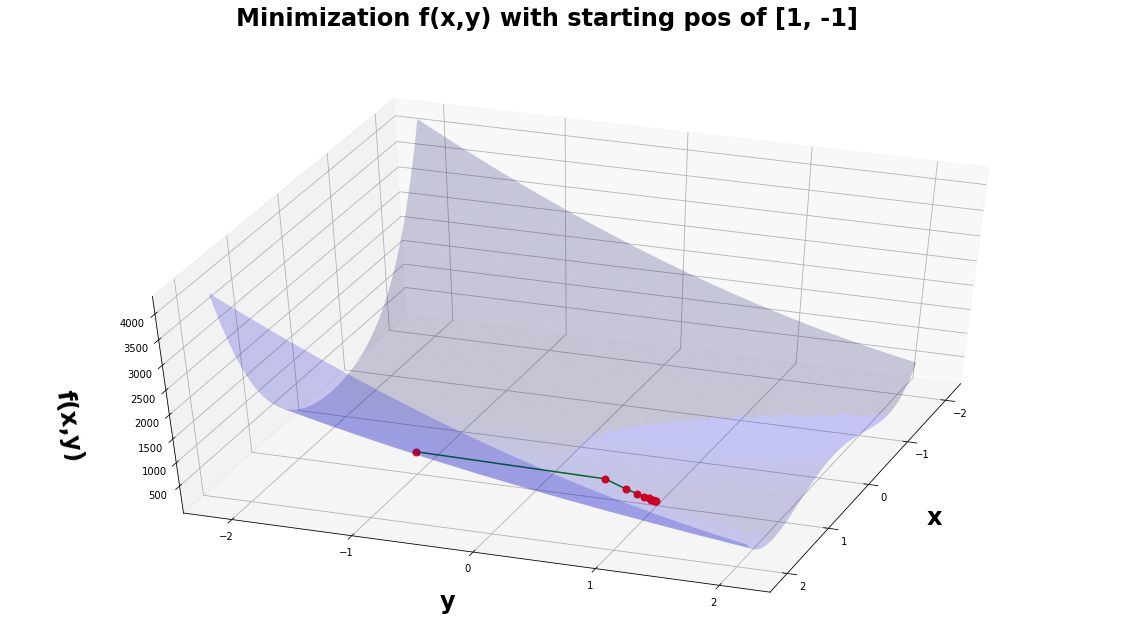

In [264]:
plot_des_2(1, dims=[-2.1, 2.1], pos=orig_pos[1]) #1 2 4 5 6

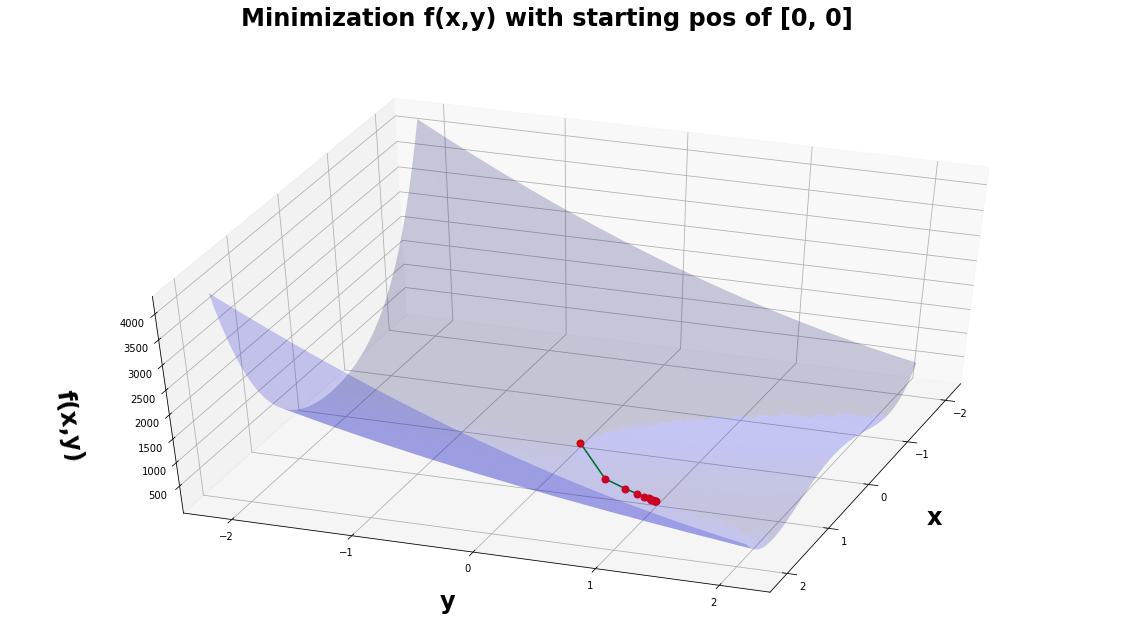

In [265]:
plot_des_2(2, dims=[-2.1, 2.1], pos=orig_pos[2]) #1 2 4 5 6

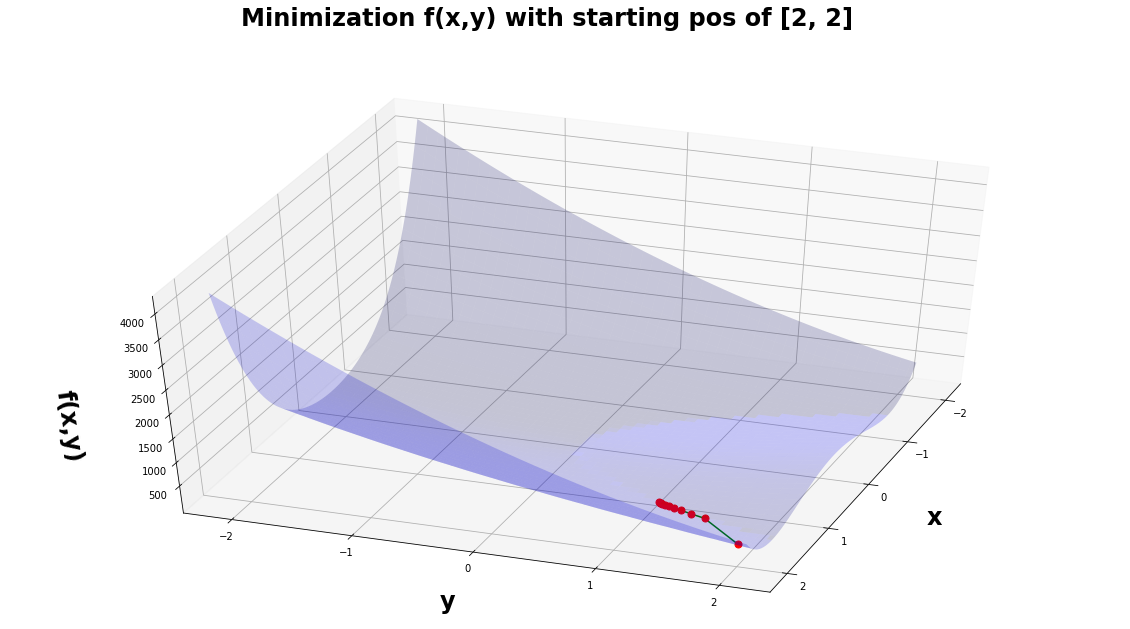

In [266]:
plot_des_2(4, dims=[-2.1, 2.1], pos=orig_pos[4]) #1 2 4 5 6

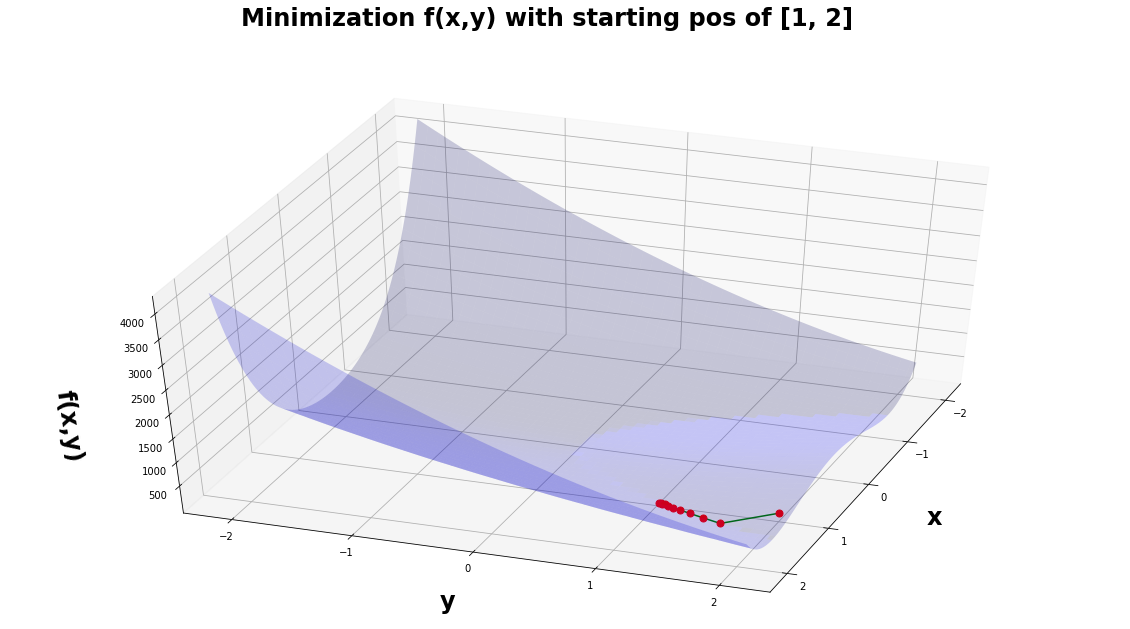

In [267]:
plot_des_2(5, dims=[-2.1, 2.1], pos=orig_pos[5]) #1 2 4 5 6

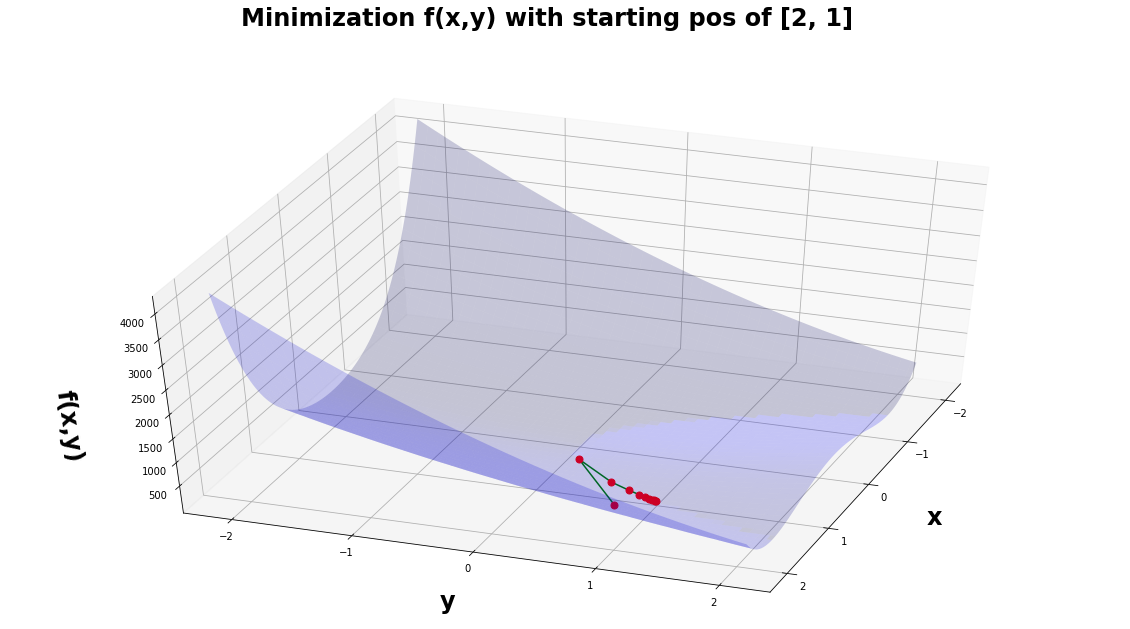

In [268]:
plot_des_2(6, dims=[-2.1, 2.1], pos=orig_pos[6]) #1 2 4 5 6

## 4 kintamųjų funkcija

In [269]:
# Defining Rosenbrock function
f = sympify('1-a**2-b**2+2*c+4*d')

# Getting all functions variables and amount of them
vars = f.atoms(Symbol)
num_of_vars = len(vars)

f

-a**2 - b**2 + 2*c + 4*d + 1

In [270]:
vars

{a, b, c, d}

In [305]:
cur_p = [1,-1,1,-1]
rate = .0000001 #atsakymas gautas
#rate = .00001

_, mini, it = grad_desc(f, vars, cur_p, rate)


In [306]:
calc = dict(zip(vars, mini))

calc

{a: 1.00000020000000,
 b: -1.00000020000000,
 c: 0.999999800000000,
 d: -1.00000040000000}

In [307]:
f.subs(calc).evalf()

-3.00000280000008

# Gradientinis nusileidimas su tensorflow

In [308]:
import tensorflow as tf

In [312]:
f1 = sympify('100*(y-x**2)**2+(1-x)**2')
vars1 = f1.atoms(Symbol)
f1_tf = lambdify(tuple(vars1), f1, 'tensorflow')

f4 = sympify('1-a**2-b**2+2*c+4*d')
vars4 = f4.atoms(Symbol)
f4_tf = lambdify(tuple(vars4), f4, 'tensorflow')

In [326]:
def loss_function1(x,y):
  return 100*(y-x**2)**2+(1-x)**2

def loss_function1_minimize():
  return 100*(y-x**2)**2+(1-x)**2

def reset1():
  x = tf.Variable(-1., tf.float32)
  y = tf.Variable(1., tf.float32)
  return x,y

x, y = reset1()
opt1 = tf.keras.optimizers.SGD(.001)
for i in range(10000):
  opt1.minimize(loss_function1_minimize, var_list=[x, y])

print('z = {:.1f}, x = {:.1f}, y = {:.1f}'
.format(loss_function1(x, y).numpy(), x.numpy(), y.numpy()))

z = 0.0, x = 1.0, y = 1.0


In [329]:
def loss_function4(a,b,c,d):
  return 1-a**2-b**2+2*c+4*d

def loss_function4_minimize():
  return 1-a**2-b**2+2*c+4*d

def reset4():
  a = tf.Variable(1., tf.float32)
  b = tf.Variable(-1., tf.float32)
  c = tf.Variable(1., tf.float32)
  d = tf.Variable(-1., tf.float32)
  return a,b,c,d

a, b,c,d = reset5()
opt4 = tf.keras.optimizers.SGD(.0000001)
for i in range(10000):
  opt4.minimize(loss_function4_minimize, var_list=[a,b,c,d])

print('z = {:.3f}, a = {:.3f}, b = {:.3f}, c = {:.13f}, d = {:.3f}'
.format(loss_function1(a,b,c,d).numpy(), a.numpy(), b.numpy(),
        c.numpy(), d.numpy()))

z = -3.027, a = 1.002, b = -1.002, c = 0.9982118606567, d = -1.004
